# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [194]:
df_breast_cancer = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [195]:
df_breast_cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [196]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [197]:
df_breast_cancer=df_breast_cancer.drop(columns="ID")

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [198]:
df_breast_cancer.info()
# All columns except bare Nuclei are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [199]:
df_breast_cancer.shape

(699, 10)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [200]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df_breast_cancer.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [201]:
df_breast_cancer[df_breast_cancer["Bare Nuclei"].str.isnumeric()==False]
# On inspecting there are 16 records having "?" in the column Bare Nuclei.


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [202]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df_breast_cancer[df_breast_cancer["Bare Nuclei"]=="?"]["Bare Nuclei"].count()

16

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [203]:
# Transform ? to NaN
df_breast_cancer = df_breast_cancer.replace('?', np.nan)

In [204]:
#Replace NaN with Median of that column
df_breast_cancer["Bare Nuclei"]=df_breast_cancer["Bare Nuclei"].fillna(df_breast_cancer["Bare Nuclei"].median())

In [206]:
# Change datatype fo Bare Nuclei to Int
df_breast_cancer["Bare Nuclei"] = df_breast_cancer["Bare Nuclei"].astype('int64')  # converting the hp column from object / string type to float

In [207]:
df_breast_cancer.info()
# Check datatyoes to see if all are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


In [208]:
df_breast_cancer.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable

In [62]:
df_breast_cancer.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.817653,0.756616,0.712244,0.423170,1.000000


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [1]:
#Let us check for pair plots

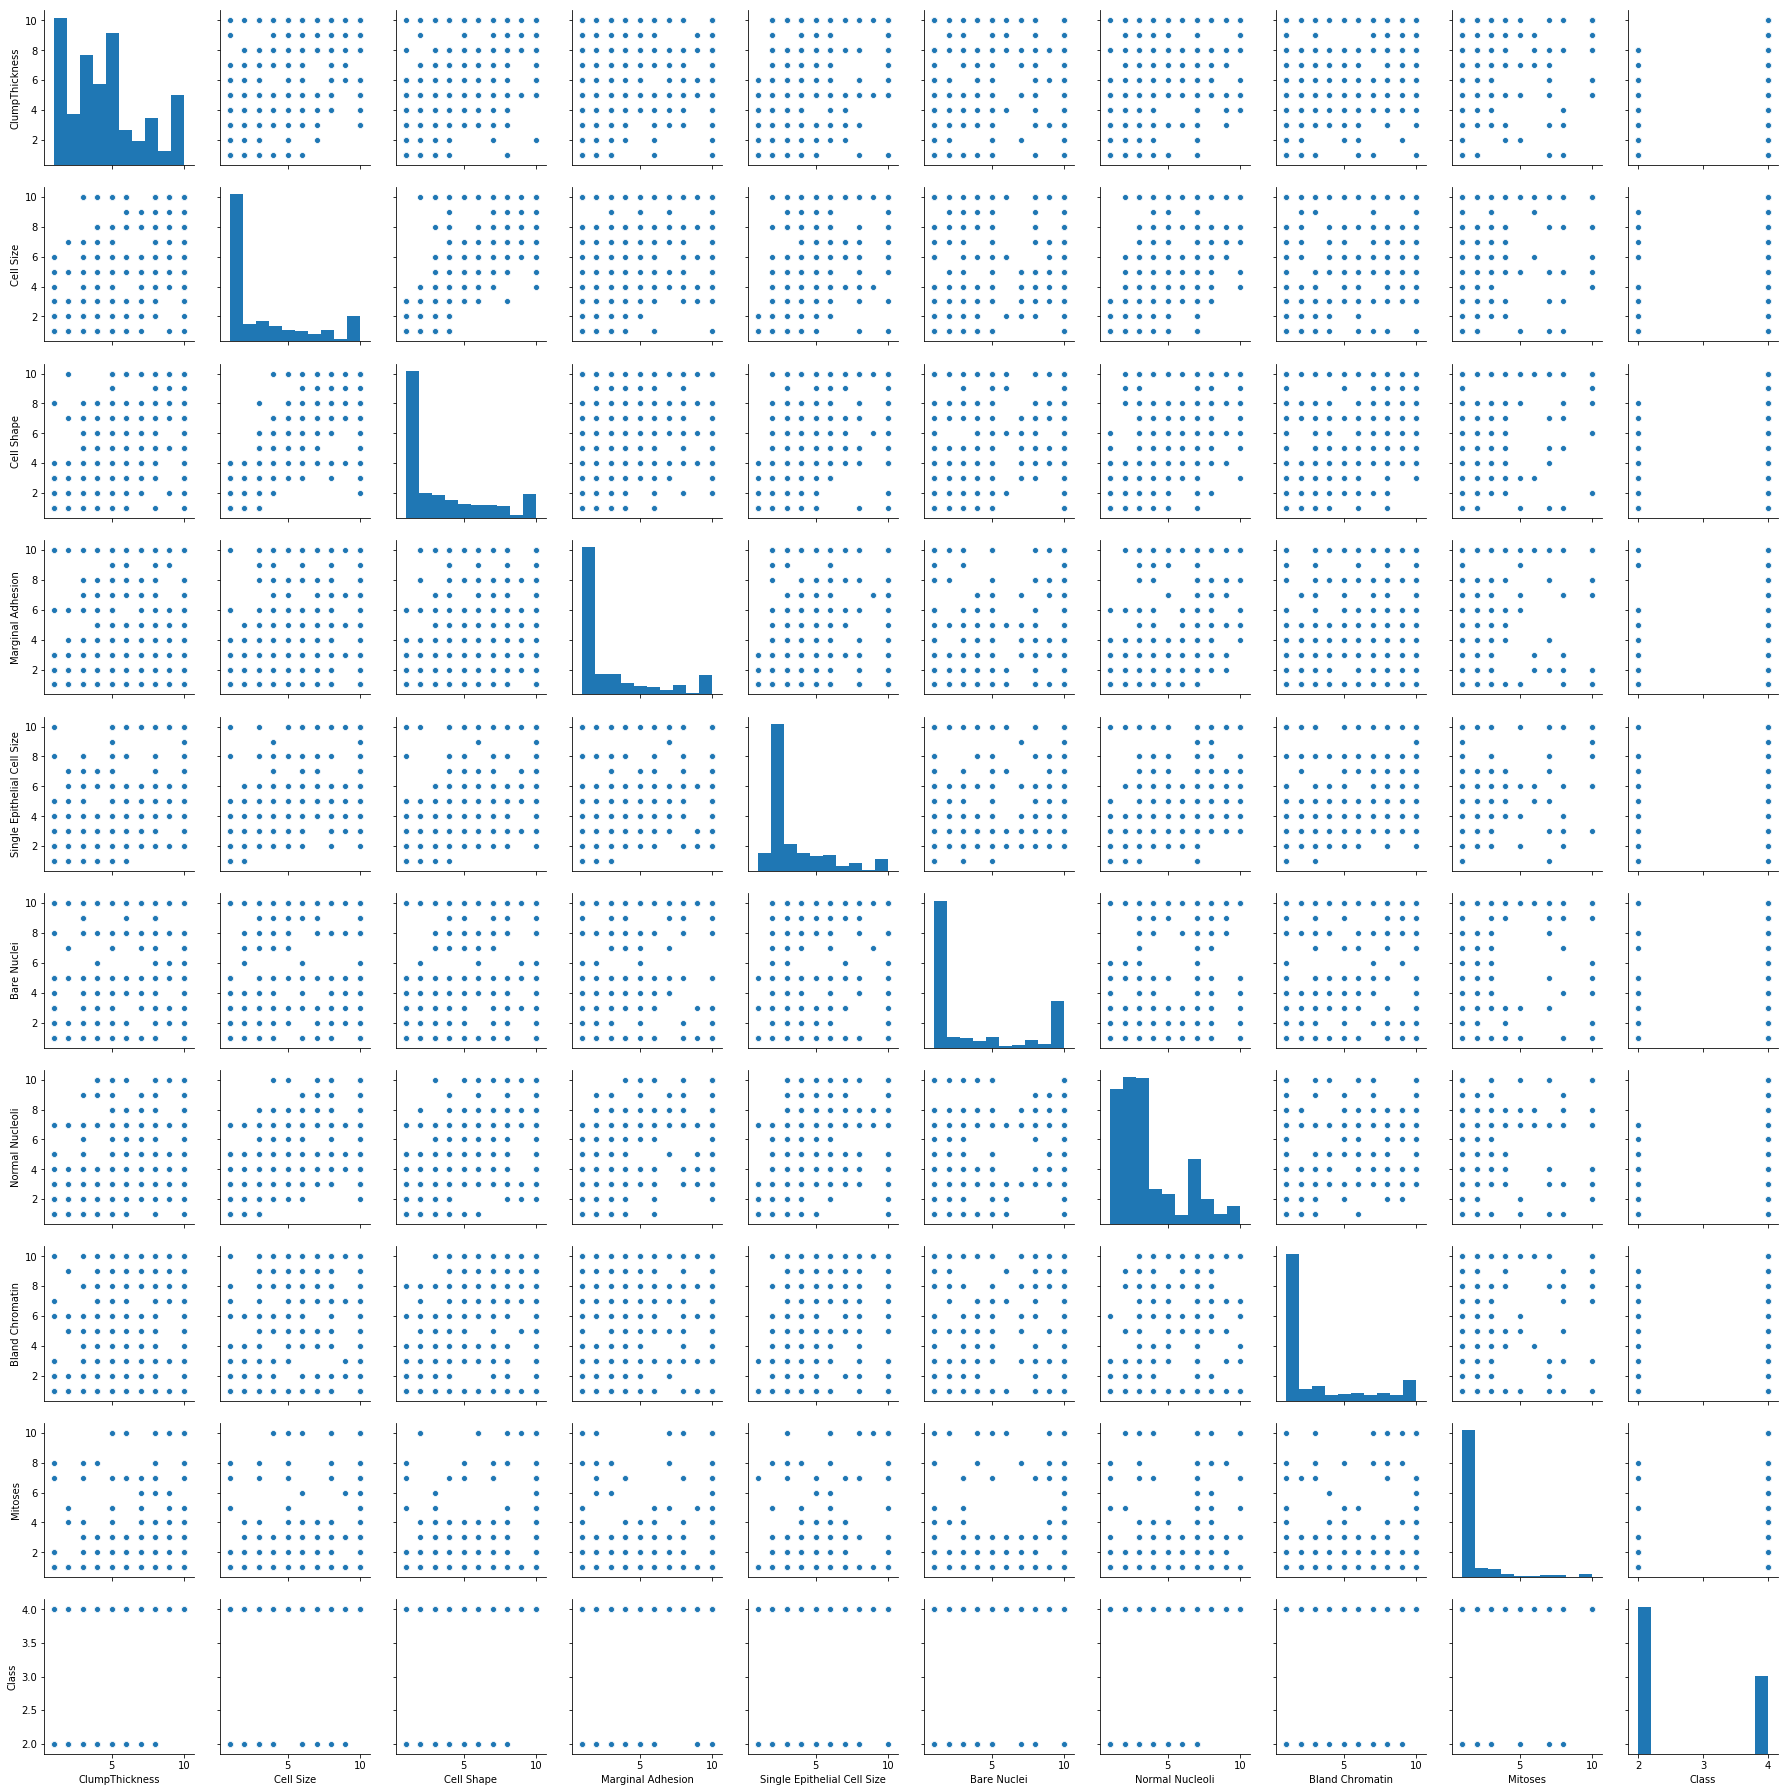

In [125]:
sns.pairplot(df_breast_cancer)

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

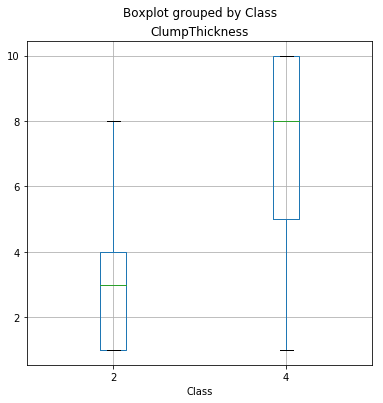

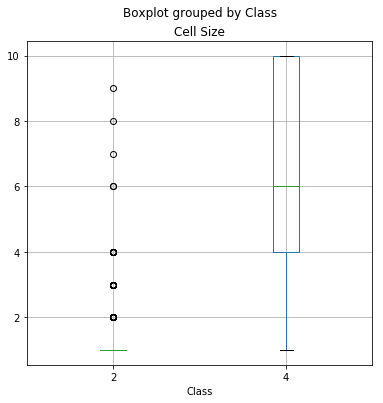

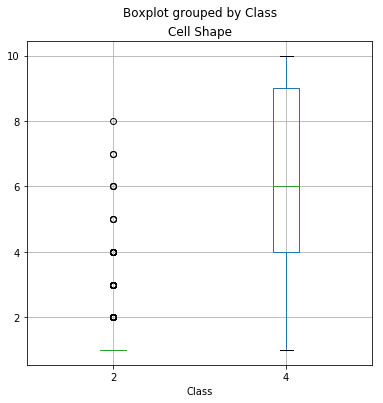

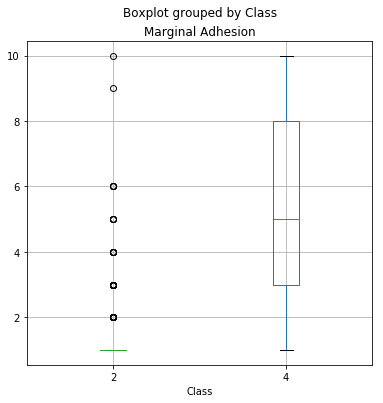

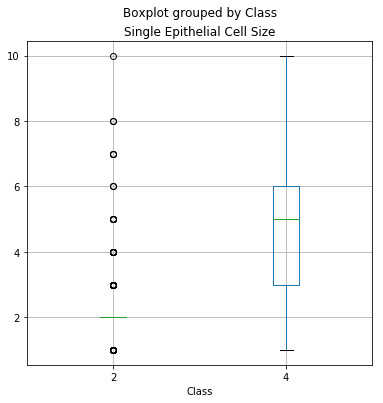

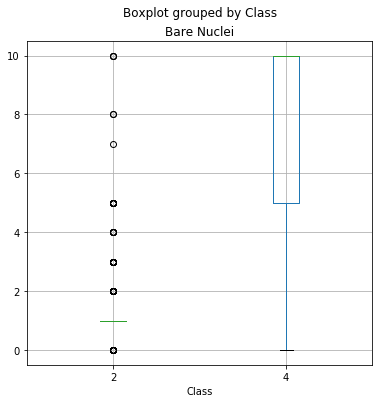

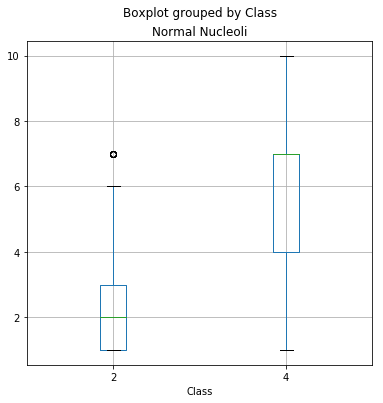

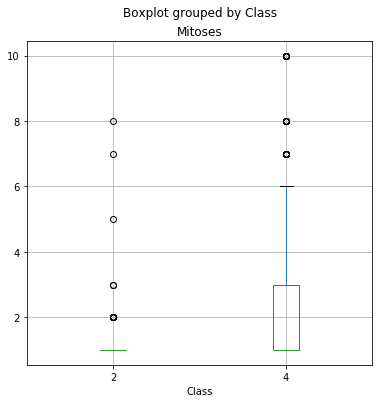

In [68]:
# Check for any outliers 
for col in ("ClumpThickness","Cell Size","Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Normal Nucleoli","Mitoses",):
    df_breast_cancer.boxplot(col,by="Class",figsize=(6,6))
    plt.show()

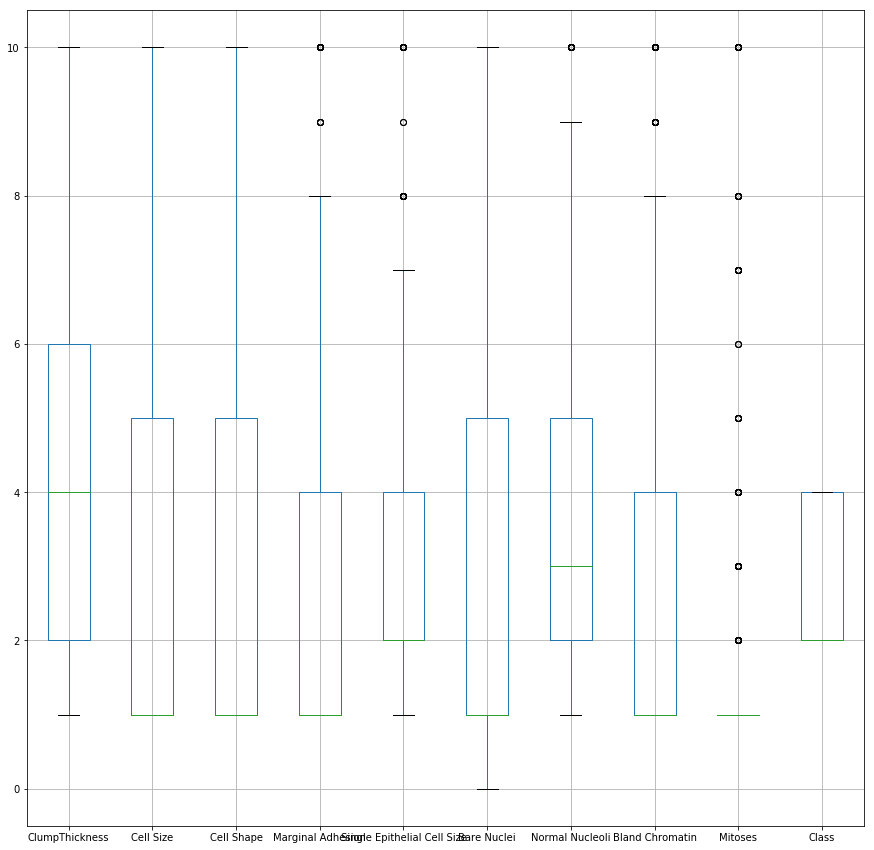

In [72]:
df_breast_cancer.boxplot(figsize=(15,15))

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [209]:
from sklearn.preprocessing import StandardScaler


In [210]:
# Remove the target Class column from the dataset
df_no_class = df_breast_cancer.drop(columns="Class")

In [211]:
sc = StandardScaler()
df_breast_cancer_std =  sc.fit_transform(df_no_class) 


# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [212]:
cov_matrix = np.cov(df_breast_cancer_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.48705303 0.52256381 0.5908535
  0.5592282  0.53660222 0.35053534]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.75287621 0.68765657
  0.75680368 0.72390044 0.4593503 ]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.72069948 0.70848734
  0.73700282 0.72047704 0.43953974]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.60045809 0.66792658
  0.66767051 0.60421681 0.41823111]
 [0.52256381 0.75287621 0.72069948 0.60045809 1.00143266 0.5845377
  0.61698451 0.62978166 0.47978787]
 [0.5908535  0.68765657 0.70848734 0.66792658 0.5845377  1.00143266
  0.67518063 0.5756016  0.34288766]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.61698451 0.67518063
  1.00143266 0.66683179 0.34466258]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.62978166 0.5756016
  0.66683179 1.00143266 0.42894941]
 [0.35053534 0.4593503  0.43953974 0.41823111 0.47978787 0.34288766
  0.34466258 0.42894941 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [213]:
# Step 2- Get eigen values and eigen vector

In [214]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30280515  0.14602888 -0.86221719  0.0014072  -0.08821658  0.07192848
   0.24081701  0.26946934 -0.00131277]
 [-0.38119012  0.04956364  0.01909154  0.73568065  0.2026394  -0.13735749
  -0.44088652  0.1000979   0.21521315]
 [-0.37757351  0.08526953 -0.0345843  -0.66537497  0.17515522 -0.10469081
  -0.58600968  0.03200191  0.14204379]
 [-0.33282286  0.04471887  0.42144828 -0.04671812 -0.4703171   0.03462797
   0.11866965  0.68083355 -0.0861038 ]
 [-0.33639134 -0.16403795  0.11010437 -0.06786939  0.37332927 -0.68258246
   0.45057208 -0.03559797 -0.18337725]
 [-0.33349748  0.2477099  -0.00367104  0.07339423 -0.5431767  -0.1275059
  -0.10299896 -0.57486596 -0.41187463]
 [-0.3459564   0.22994199  0.19744944 -0.05881119 -0.00698988  0.25519148
   0.40975993 -0.31459721  0.67301535]
 [-0.33584019 -0.02502678  0.13164974  0.01889835  0.45537199  0.63180293
   0.08247514 -0.03841564 -0.50406321]
 [-0.22981766 -0.90839421 -0.09459348 -0.0075291  -0.23968608  0.1316273
  -0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [215]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.898551899582241, array([-0.30280515, -0.38119012, -0.37757351, -0.33282286, -0.33639134,
       -0.33349748, -0.3459564 , -0.33584019, -0.22981766])), (0.7758830680807647, array([ 0.14602888,  0.04956364,  0.08526953,  0.04471887, -0.16403795,
        0.2477099 ,  0.22994199, -0.02502678, -0.90839421])), (0.539601554819918, array([-0.86221719,  0.01909154, -0.0345843 ,  0.42144828,  0.11010437,
       -0.00367104,  0.19744944,  0.13164974, -0.09459348])), (0.4664055506212335, array([-0.08821658,  0.2026394 ,  0.17515522, -0.4703171 ,  0.37332927,
       -0.5431767 , -0.00698988,  0.45537199, -0.23968608])), (0.38101775525038944, array([ 0.07192848, -0.13735749, -0.10469081,  0.03462797, -0.68258246,
       -0.1275059 ,  0.25519148,  0.63180293,  0.1316273 ])), (0.30405591873920346, array([ 0.26946934,  0.1000979 ,  0.03200191,  0.68083355, -0.03559797,
       -0.57486596, -0.31459721, -0.03841564, -0.14360708])), (0.29609473619399845, array([-0.00131277,  0.21521315,  0.14204379, -

In [216]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


In [217]:
print(var_explained)


[0.6544570379762203, 0.08608589755529701, 0.05986995473919927, 0.0517487004186331, 0.042274740607975154, 0.03373565908122141, 0.032852348730473824, 0.029106580311492932, 0.009869080579486803]


In [218]:
print(cum_var_exp)

[0.65445704 0.74054294 0.80041289 0.85216159 0.89443633 0.92817199
 0.96102434 0.99013092 1.        ]


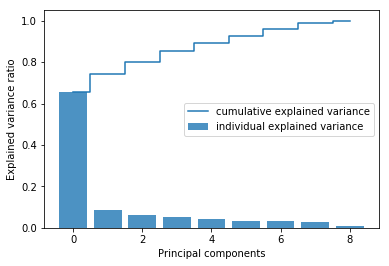

In [227]:
plt.bar(np.arange(len(var_explained)), var_explained, alpha=0.8, align='center', label='individual explained variance')
plt.step(np.arange(len(cum_var_exp)),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [228]:
from sklearn.decomposition import PCA

In [229]:
scikit_pca = PCA(n_components=7)
spca = scikit_pca.fit_transform(df_breast_cancer_std)

In [235]:
breast_cancer_data_df = pd.DataFrame(spca)

# Q10 Find correlation between components and features

In [236]:
breast_cancer_data_df.corr()

,0,1,2,3,4,5,6
0,1.000000e+00,-7.732453e-17,2.663950e-16,-1.227468e-17,8.806181e-17,-9.180892e-17,2.339715e-16
1,-7.732453e-17,1.000000e+00,2.885946e-16,-2.146994e-16,7.211091e-17,1.083947e-16,-9.291789e-18
2,2.663950e-16,2.885946e-16,1.000000e+00,-3.503472e-17,-1.245300e-17,-1.537352e-16,6.685165e-17
3,-1.227468e-17,-2.146994e-16,-3.503472e-17,1.000000e+00,-1.922403e-16,-4.106522e-16,-1.506608e-16
4,8.806181e-17,7.211091e-17,-1.245300e-17,-1.922403e-16,1.000000e+00,-5.905635e-17,-1.463273e-16
5,-9.180892e-17,1.083947e-16,-1.537352e-16,-4.106522e-16,-5.905635e-17,1.000000e+00,-4.627826e-16
6,2.339715e-16,-9.291789e-18,6.685165e-17,-1.506608e-16,-1.463273e-16,-4.627826e-16,1.000000e+00


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [246]:
df_jokes=pd.read_csv("jokes.csv",header='infer')

In [247]:
df_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [242]:
df_jokes.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [248]:
ratings_df=df_jokes.iloc[0:200,:]

In [293]:
ratings_df.shape

(200, 101)

# Q22 Change the column indices from 0 to 99

In [294]:

ratings_df = ratings_df.T.reset_index(drop=True).T

In [295]:
ratings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48.0,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [296]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 101 entries, 0 to 100
dtypes: float64(101)
memory usage: 157.9 KB


In [297]:
ratings_df.replace(99.00,0,inplace=True)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [299]:
scaler = StandardScaler()
ratings_diff =  scaler.fit_transform(ratings_df) 

,0
69,3.907985e-16
62,3.574918e-16
32,2.076117e-16
14,2.012279e-16
56,1.898481e-16
99,1.772194e-16
37,1.587619e-16
42,1.443290e-16
68,1.437652e-16
58,1.298961e-16


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [302]:
ratings_mean_df=pd.DataFrame(ratings_diff.mean(axis=0))

In [303]:
# Top 10 Joke Ratings. Please note, for some reason the results are varying for each user
ratings_mean_df.sort_values(by=0,ascending=False).head(10)

,0
69,3.907985e-16
62,3.574918e-16
32,2.076117e-16
14,2.012279e-16
56,1.898481e-16
99,1.772194e-16
37,1.587619e-16
42,1.443290e-16
68,1.437652e-16
58,1.298961e-16
